In [149]:
#mporting essential libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [127]:
#Training data and test data
Train_X=pickle.load(open('classificationX4','rb'))
Train_Y=pickle.load(open('classificationY4','rb'))
Test_X=pickle.load(open('classificationTest3','rb'))
X=pickle.load(open('classificationTestx3','rb'))


In [128]:
#Reshaping training and test data
Train_X=np.expand_dims(Train_X, axis=-1)
Test_X=np.expand_dims(Test_X, axis=-1)

In [116]:
#Classifier model---The input is 50x50 matrix output is probability
Classifier = Sequential()
Classifier.add(Convolution2D(64,3,3,input_shape = (50,50,1),activation = 'relu'))
Classifier.add(MaxPooling2D(pool_size = (2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(output_dim=100,activation = 'relu'))
Classifier.add(Dense(output_dim=1,activation = 'sigmoid'))
Classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
Classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               3686500   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 3,687,241
Trainable params: 3,687,241
Non-trainable params: 0
_________________________________________________________________


G:\anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(50, 50, 1..., activation="relu")`
  
G:\anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
  """
G:\anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [145]:
#Train the model
history = Classifier.fit(Train_X,Train_Y,epochs=100,validation_split=0.1)

Train on 102 samples, validate on 12 samples
Epoch 1/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.9020 - val_loss: 3.6538e-04 - val_acc: 1.0000
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.9020 - val_loss: 3.6813e-04 - val_acc: 1.0000
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.9020 - val_loss: 3.4266e-04 - val_acc: 1.0000
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.9020 - val_loss: 3.5588e-04 - val_acc: 1.0000
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.9020 - val_loss: 3.5750e-04 - val_acc: 1.0000
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.9020 - val_loss: 3.3838e-04 - val_acc: 1.0000
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.9020 - val_loss: 3.4097e-04 - val_acc: 1.0

102/102 [==============================] - 0s 2ms/step - loss: 0.0688 - acc: 0.9020 - val_loss: 2.5773e-04 - val_acc: 1.0000
Epoch 61/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0696 - acc: 0.9020 - val_loss: 2.7815e-04 - val_acc: 1.0000
Epoch 62/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0699 - acc: 0.9020 - val_loss: 1.6497e-04 - val_acc: 1.0000
Epoch 63/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0695 - acc: 0.9020 - val_loss: 3.2720e-04 - val_acc: 1.0000
Epoch 64/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0710 - acc: 0.9020 - val_loss: 1.3835e-04 - val_acc: 1.0000
Epoch 65/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0703 - acc: 0.9020 - val_loss: 3.3466e-04 - val_acc: 1.0000
Epoch 66/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0755 - acc: 0.9020 - val_loss: 1.4933e-04 - val_acc: 1.0000
Epoch 67/100
102/102 [=========================

In [146]:
#Prediction using test data
Result=Classifier.predict(Test_X)

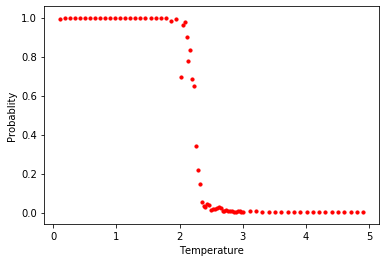

In [148]:
#Predicted data plotted against temperature
plt.scatter(X,Result,s=10,c='red')
plt.xlabel('Temperature')
plt.ylabel('Probablity')
plt.show()

In [151]:
#save the model
Classifier.save('Classification.h5')